This undirected network contains interactions between 28 Grévy's zebras (Equus grevyi) in Kenya. A node represents a zebra and an edge between two zebras shows that there was an interaction between them during the study.


REFERENCE
Sundaresan, S. R., I. R. Fischhoff, J. Dushoff and D. I. Rubenstein. 2007. "Network metrics reveal diVerences in social organization between two Wssion-fusion species, Grevy's zebra and onager." Oecologia 151:140-149

<a href='http://konect.uni-koblenz.de/networks/moreno_zebra'>Dataset</a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd

from itertools import combinations
from nxviz import ArcPlot
from nxviz import CircosPlot
from nxviz import MatrixPlot
from hiveplot import HivePlot


warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
#load the network

# Read the edge list

df = pd.read_csv(
    'moreno_zebra/out.moreno_zebra_zebra', sep=' ', skiprows=2, header=None)
df = df[[0, 1]]
df.columns = ['zebra1', 'zebra2']

G = nx.Graph()
for row in df.iterrows():
    G.add_edge(row[1]['zebra1'], row[1]['zebra2'])

Draw it using the Kamada and Kawaia algorithm for drawing general undirected graphs

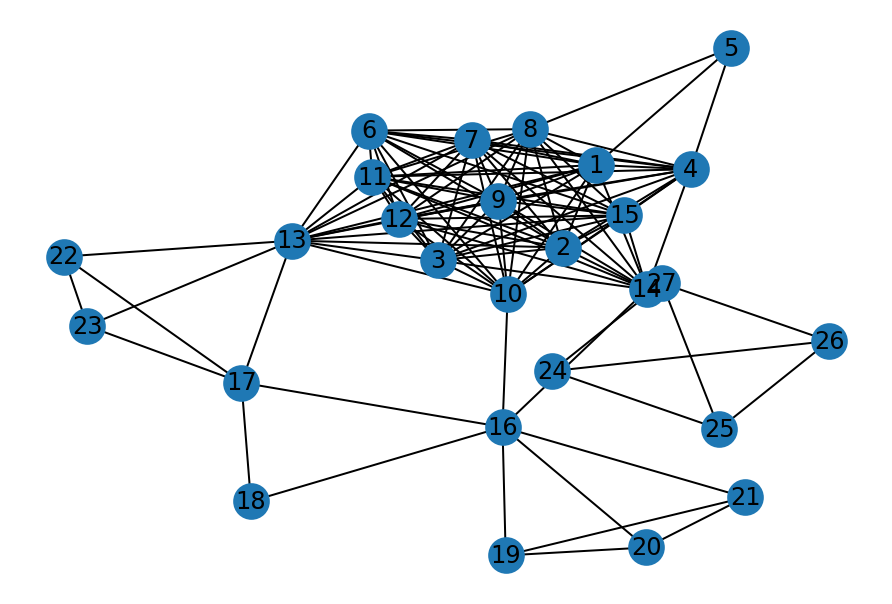

In [3]:
nx.draw_kamada_kawai(G , with_labels=True)

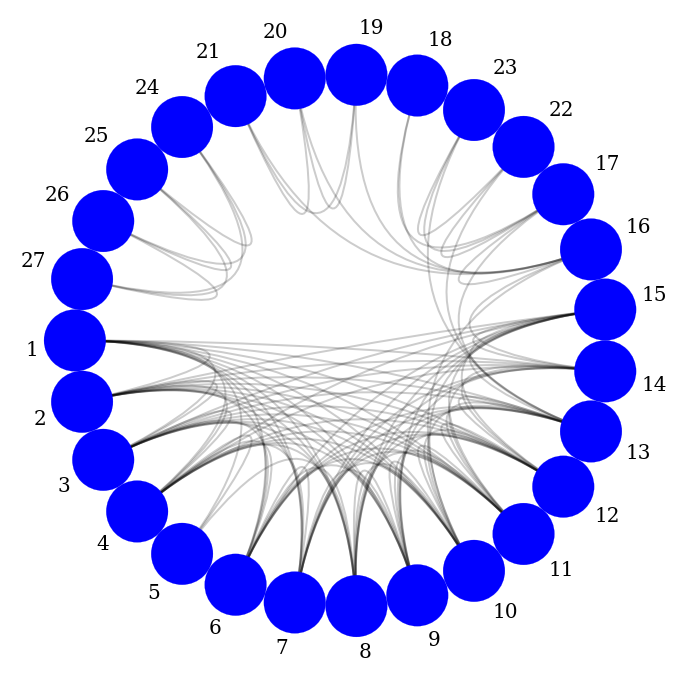

In [4]:
c = CircosPlot(G , node_labels=True)
c.draw()

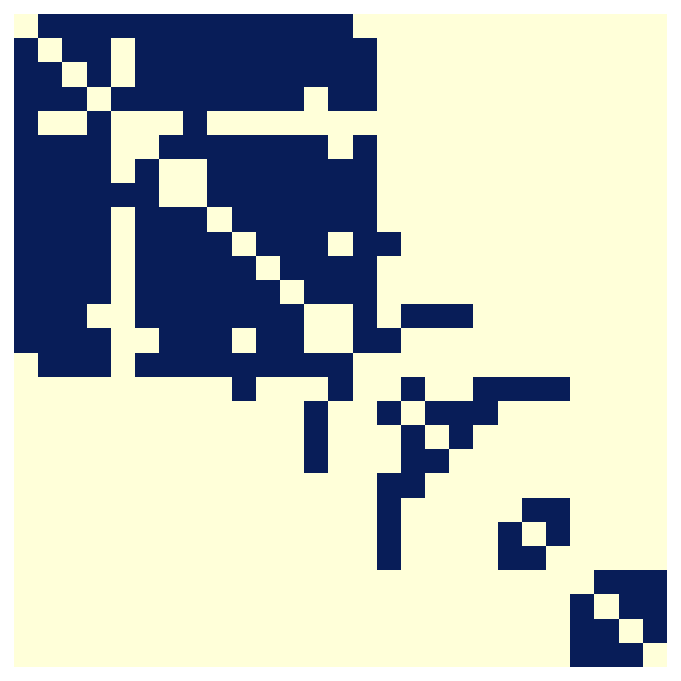

In [5]:
m = MatrixPlot(G)
m.draw()

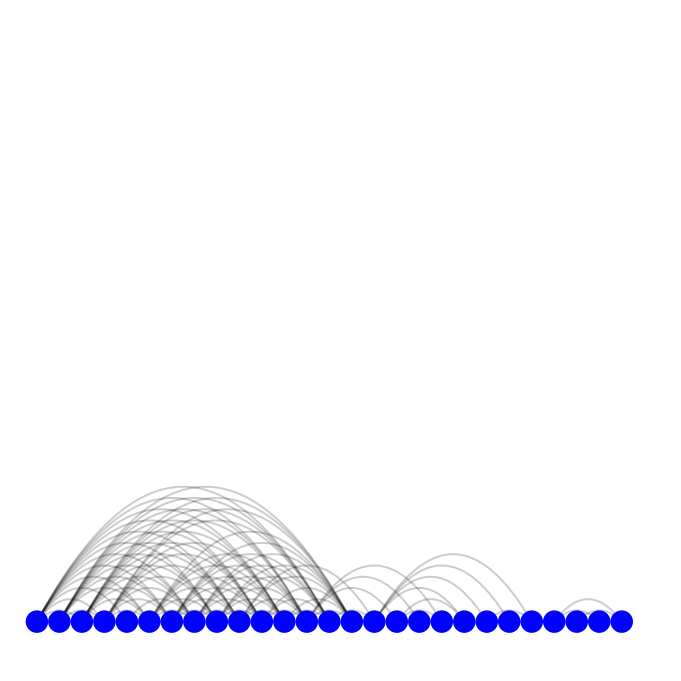

In [6]:
a = ArcPlot(G)
a.draw()

-> capisco che è composto da subnetwork!

# Cliques

In a social network, cliques are groups of people in which everybody knows everybody.
The most simple Clique is a Triangle.
NetworkX has a function that *counts* the number of triangles that any given node is involved in

In [7]:
nx.triangles(G, 3)

72

In [8]:
nx.triangles(G, 26)

3

In [9]:
nx.triangles(G, 18)

1

NetworkX has a [clique-finding](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.clique.find_cliques.html) algorithm implemented, that finds all maximal cliques in a graph.

Maximal cliques are the largest complete subgraph containing a given node. The largest maximal clique is sometimes called the maximum clique.

In [13]:
list(nx.find_cliques(G))

[[4, 1, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 1, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 1, 2, 3, 9, 11, 12, 14, 8],
 [4, 1, 2, 3, 9, 11, 12, 14, 7],
 [4, 1, 5, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 8],
 [4, 15, 2, 3, 9, 11, 12, 6, 10, 7],
 [4, 15, 2, 3, 9, 11, 12, 14, 8],
 [4, 15, 2, 3, 9, 11, 12, 14, 7],
 [13, 17, 22, 23],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 8, 15],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 1],
 [13, 2, 3, 6, 9, 10, 11, 12, 7, 15],
 [14, 16],
 [16, 19, 20, 21],
 [16, 17, 18],
 [16, 10],
 [24, 25, 26, 27]]

In [15]:
nx.cliques_containing_node(G, nodes=16)

[[14, 16], [16, 19, 20, 21], [16, 17, 18], [16, 10]]

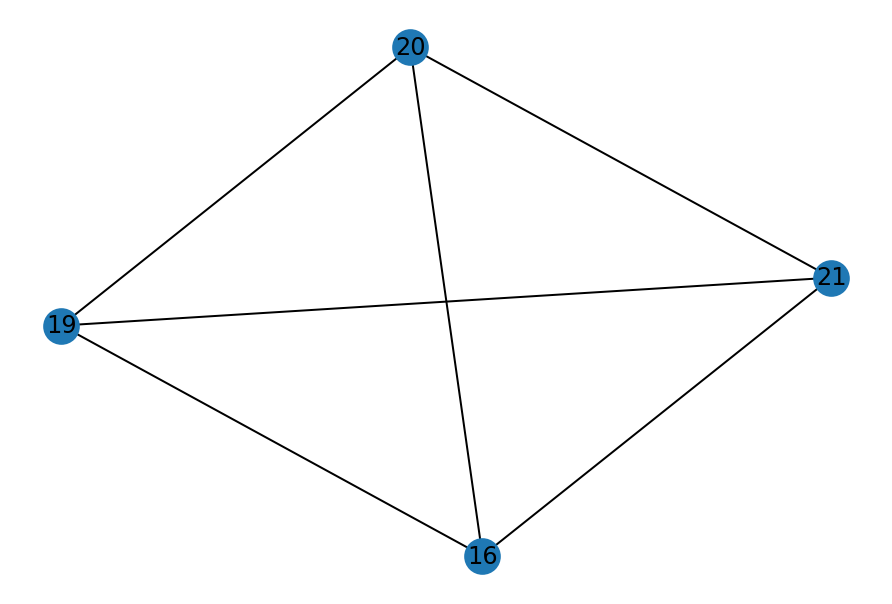

In [11]:
# disegna il sottografo di una clique contenente il nodo 18
Q16 = G.subgraph(list(nx.cliques_containing_node(G, nodes=16))[1])
nx.draw(Q16 , with_labels=True)

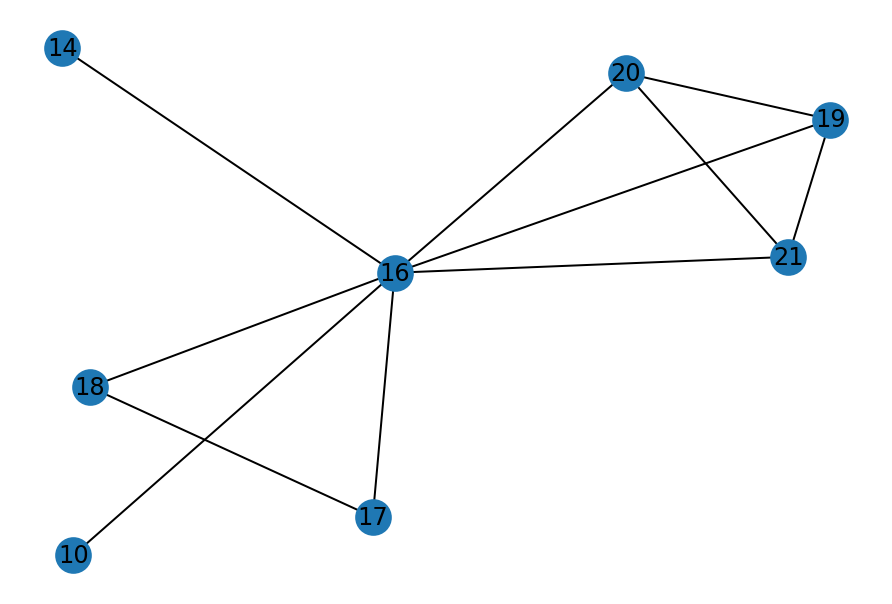

In [12]:
neighbors16 =  list(G.neighbors(16))
neighbors16.append(16) #aggiungo 27 alla lista dei suoi vicini
nx.draw(G.subgraph(neighbors16), with_labels=True)

# Connected Components

In graph theory, a connected component (or just component) of an undirected graph is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

Remember how based on the Circos plot above, we had this hypothesis that the zebra network may be divided into subgraphs. Let's check that, and see if we can redraw the Circos visualization.

In [16]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

ccsubgraphs = list(connected_component_subgraphs(G))
ccsubgraphs

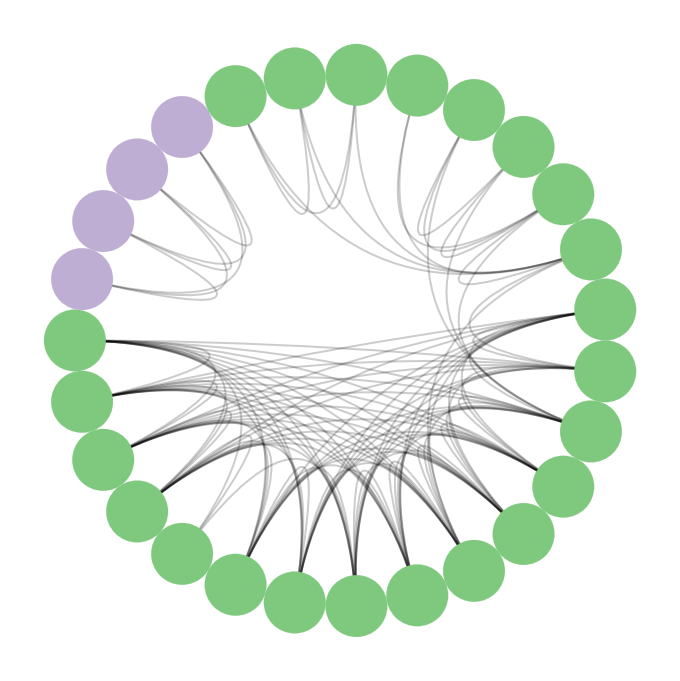

In [22]:
for i, g in enumerate(ccsubgraphs):
    for n in g.nodes():
        G.nodes[n]['subgraph'] = i
        
c = CircosPlot(G, node_color='subgraph', node_order='subgraph')
c.draw()
#plt.savefig('images/physicians.png', dpi=300)

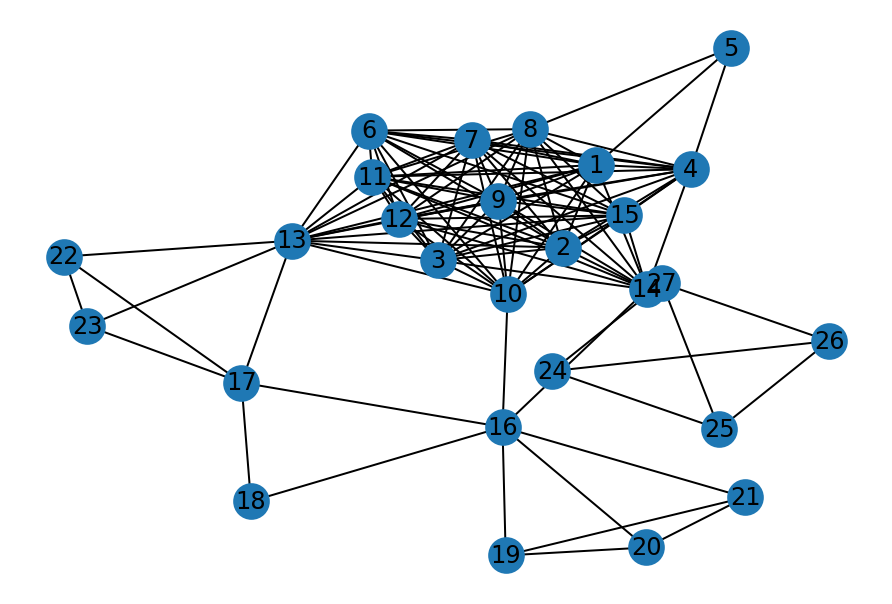

In [30]:
nx.draw_kamada_kawai(G , with_labels=True)

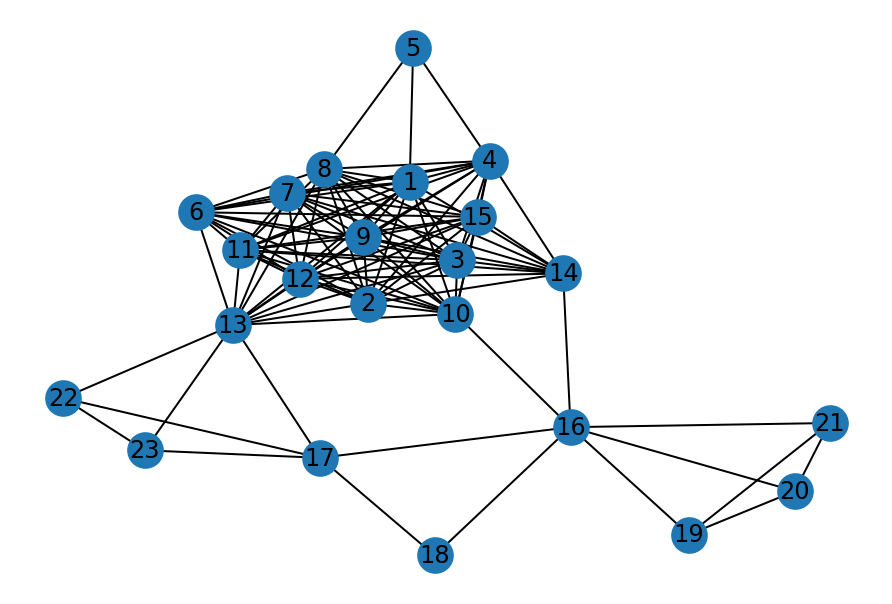

In [20]:
nx.draw_kamada_kawai(ccsubgraphs[0] , with_labels=True)

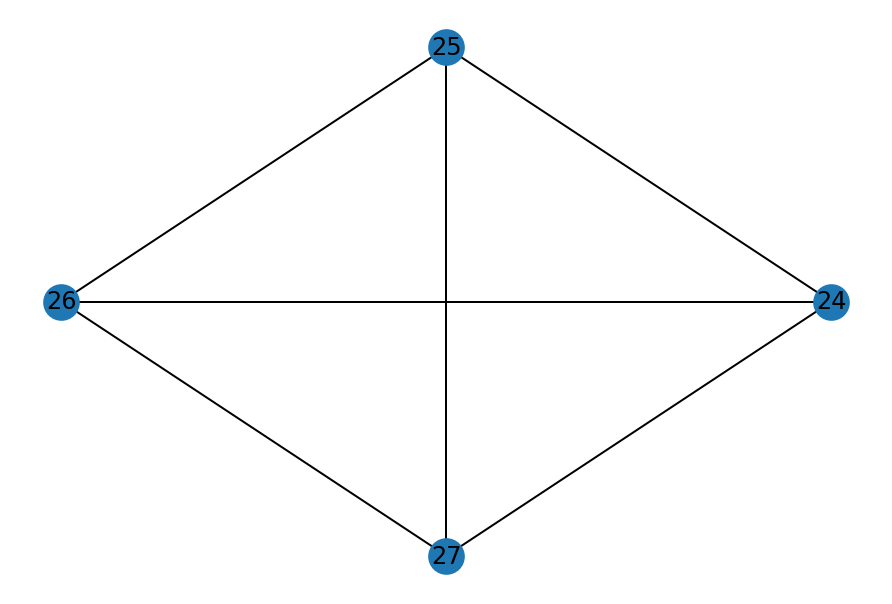

In [21]:
nx.draw_kamada_kawai(ccsubgraphs[1] , with_labels=True)